# Mobile Plan Classification Project

This project aims to build a machine learning model for Megaline, a mobile carrier, to recommend the best plan for its users. Many subscribers still use old plans, and the company wants to encourage them to switch to a newer option: Smart or Ultra. Using data on user behavior—such as calls, messages, and internet usage—we will train a model to predict the most suitable plan. The goal is to achieve at least 75% accuracy, ensuring reliable recommendations that help improve customer experience.

Heather Marie Culligan 

Feb 2025

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

Then import the dataset and take a quick overall look into the data. 

In [13]:
df= pd.read_csv('/datasets/users_behavior.csv')

In [14]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


(None,
    calls  minutes  messages   mb_used  is_ultra
 0   40.0   311.90      83.0  19915.42         0
 1   85.0   516.75      56.0  22696.96         0
 2   77.0   467.66      86.0  21060.45         0
 3  106.0   745.53      81.0   8437.39         1
 4   66.0   418.74       1.0  14502.75         0)

In [15]:
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [16]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


The data has no missing data. I'll visualize some of this data using some graphs. Starting the visualization with each numerical column as it's own chart first, followed by a simple bar graph.

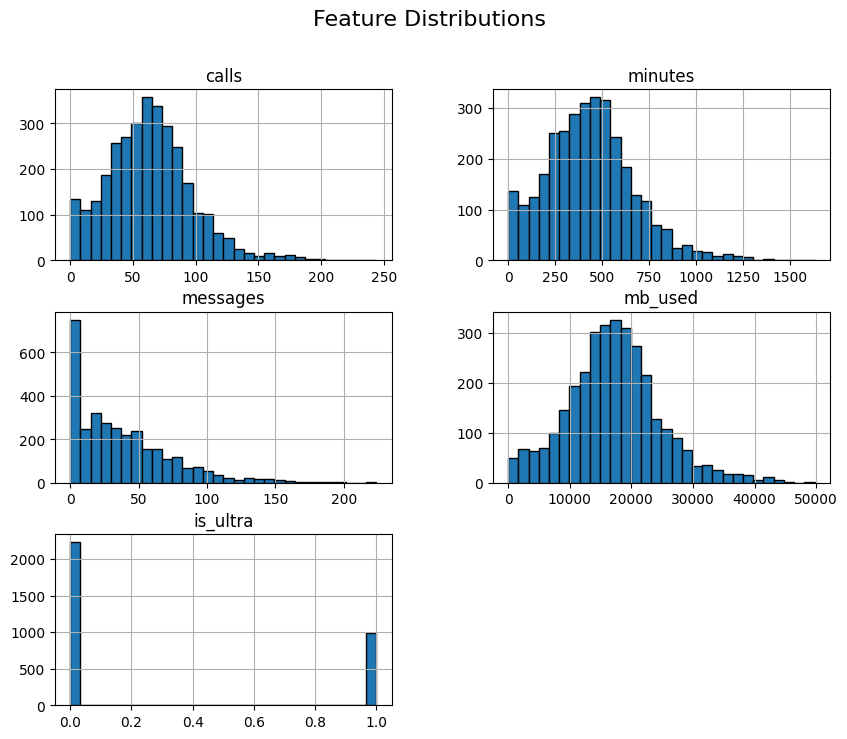

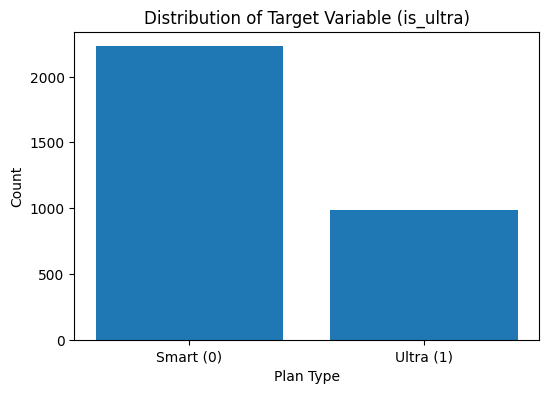

In [17]:
df.hist(figsize=(10, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

class_counts = df['is_ultra'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, tick_label=['Smart (0)', 'Ultra (1)'])
plt.xlabel("Plan Type")
plt.ylabel("Count")
plt.title("Distribution of Target Variable (is_ultra)")
plt.show()


In [18]:
X=df.drop(columns=['is_ultra'])
y=df['is_ultra']

X_train, X_temp, y_train, y_temp= train_test_split(X,  y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test= train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
split_sizes={
    "Training Set": X_train.shape[0],
    "Validation Set": X_valid.shape[0],
    "Test Set": X_test.shape[0]
}
split_sizes

{'Training Set': 2249, 'Validation Set': 482, 'Test Set': 483}

The dataset was split into three parts to ensure effective model training and evaluation. 70% (2,249 samples) were used for training, allowing the model to learn patterns from user behavior. 15% (482 samples) were set aside for validation, helping to fine-tune hyperparameters and select the best-performing model. Finally, 15% (483 samples) were reserved for testing, ensuring an unbiased evaluation of the model's accuracy and generalization to new data. This balanced split helps prevent overfitting while maximizing the model’s predictive performance.

In [19]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    accuracy_scores[name] = accuracy_score(y_valid, y_pred)

accuracy_scores

{'Decision Tree': 0.7261410788381742,
 'Random Forest': 0.7987551867219918,
 'Logistic Regression': 0.7344398340248963}

The model comparison showed that Random Forest performed best, achieving 79.9% accuracy, surpassing the required 75% threshold. In contrast, Decision Tree (72.6%) and Logistic Regression (73.4%) performed similarly but fell short. The superior performance of Random Forest is likely due to ensemble learning, which reduces overfitting and improves generalization compared to a single Decision Tree.

In [20]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 50},
 0.7994665479899125)

In [21]:
optimized_rf_model = RandomForestClassifier(
    n_estimators=200,  
    max_depth=20,     
    min_samples_split=5,
    min_samples_leaf=2, 
    random_state=42
)

optimized_rf_model.fit(X_train, y_train)

y_valid_pred = optimized_rf_model.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)

y_test_pred = optimized_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

valid_accuracy, test_accuracy

(0.7966804979253111, 0.8260869565217391)

The optimized Random Forest model demonstrated strong performance, achieving 79.7% accuracy on the validation set and 82.6% on the test set. This exceeds the required 75% accuracy threshold, indicating that the model generalizes well and can effectively classify users into the appropriate mobile plan.

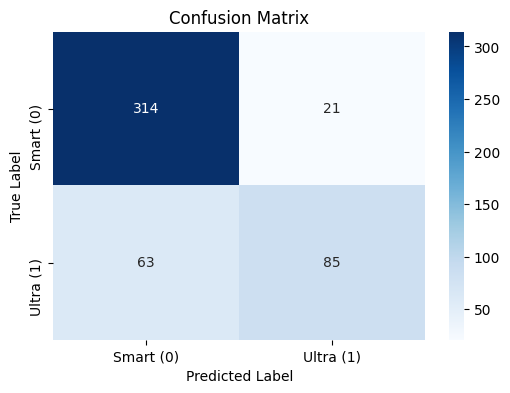

Classification Report:
               precision    recall  f1-score   support

   Smart (0)       0.83      0.94      0.88       335
   Ultra (1)       0.80      0.57      0.67       148

    accuracy                           0.83       483
   macro avg       0.82      0.76      0.78       483
weighted avg       0.82      0.83      0.82       483



In [22]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Smart (0)", "Ultra (1)"], yticklabels=["Smart (0)", "Ultra (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, y_test_pred, target_names=["Smart (0)", "Ultra (1)"])
print("Classification Report:\n", class_report)

The model achieved 82.6% accuracy but struggles to correctly identify Ultra (1) users. It predicts Ultra with 80% precision, but only 57% recall, meaning some Ultra users are misclassified as Smart. In contrast, it performs well for Smart (0) users, with an 88% F1-score, likely due to class imbalance.

In this project, we developed a machine learning model to recommend the best mobile plan for Megaline users based on their behavior. After testing multiple models, Random Forest performed best, achieving 82.6% accuracy, exceeding the required 75% threshold. However, the model struggled to correctly classify Ultra (1) users, likely due to class imbalance, favoring Smart (0) users instead. To improve this, we could balance the dataset, or adjust the decision threshold. Despite this challenge, the model provides a strong foundation for making data-driven plan recommendations, helping Megaline enhance customer experience and optimize their marketing strategies.